# 习题一

<center><font face="楷书"，size=8>Author:孟群康</font></center>
<center><font face="楷书"，size=8>Student_number:2022202020095</font></center>

## 一、题干

使用Newton和弦割法求解方程：$$xe^x-1=0 (\epsilon = 1e-6)$$
迭代初始值选择：

(1)Newton法中$x_0=0.5$

(2)弦割法中$x_0=0.5,x_1=0.6$

为了对比两种方法的求解精度和收敛速度，这里使用Python求解该方程的解析解用于和后面方法做对比

In [7]:
import sympy as sp

# Define variable x
x = sp.Symbol('x')

# Define function f
f = x*sp.exp(x) - 1

# Solve for x
sol = sp.solve(f, x)

# Print the value of x
print(sol)

[LambertW(1)]


可以发现，这个方程的解析解无法用初等函数表示，求解结果是用$LambertW$函数表示的，$LambertW$函数是$w=ze^w$的解，其中$w$和$z$都是复数

## 二、Newton方法求解

Newton方法是求解函数$f(x)$的零点的一种迭代方法，类似于机器学习中的梯度下降法。即求解$f(x)=0$.基本步骤可以用伪代码表示如下：

```
Choose an initial guess x_0.
While |f(x_n)| > ε do:
  Compute the slope at the current point: f'(x_n)
  Compute the offset needed to get to y=0 (the root) with that slope: f(x_n) / f'(x_n)
  Update the estimate: x_{n+1} = x_n - f(x_n)/f'(x_n)
End While
```

In [28]:
import math

def f(x):
    return x * math.exp(x) - 1

def df(x):
    return (x + 1) * math.exp(x)

def newton_raphson(x, e):
    iter = 0
    middle_result=[x]
    while True:
        iter += 1
        fx = f(x)
        if abs(fx) < e:
            break
        dfx = df(x)
        if dfx == 0:
            break
        x = x - fx / dfx
        middle_result.append(x)
    return x,iter,middle_result

# initial guess
x0 = 0.5

# tolerance
epsilon = 1e-6

# apply Newton-Raphson method
root,iters,middle_result = newton_raphson(x0, epsilon)

print("The solution is",root,",with iteration times",iters-1)
print(middle_result)

The solution is 0.567143290533261 ,with iteration times 3
[0.5, 0.5710204398084222, 0.5671555687441145, 0.567143290533261]


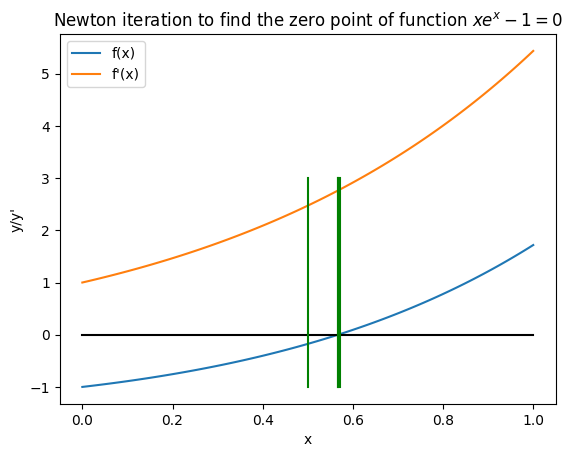

In [35]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,1,100)
y=[]
y_=[]
y_axis = []
for i in x:
    y.append(f(i))
    y_.append(df(i))    
    y_axis.append(0)

y_sca = np.linspace(-1,3,100)
x_0 = []
x_1 = []
x_2 = []
x_3 = []
for i in y_sca:
    x_0.append(middle_result[0])
    x_1.append(middle_result[1])
    x_2.append(middle_result[2])
    x_3.append(middle_result[3])


plt.plot(x,y,label = 'f(x)')
plt.plot(x,y_,label = "f'(x)")
plt.plot(x,y_axis,color="black")
plt.plot(x_0,y_sca,color = "green")
plt.plot(x_1,y_sca,color = "green")
plt.plot(x_2,y_sca,color = "green")
plt.plot(x_3,y_sca,color = "green")


# plt.scatter(x_disrete_point,y_est,color = 'red')
# plt.scatter(x_disrete_point,y_acc,color = 'red')
plt.xlabel("x")
plt.ylabel("y/y'")
plt.title(r"Newton iteration to find the zero point of function $xe^x-1=0$")
plt.legend(loc = 'upper left')
plt.show()

更加精细的放大看：

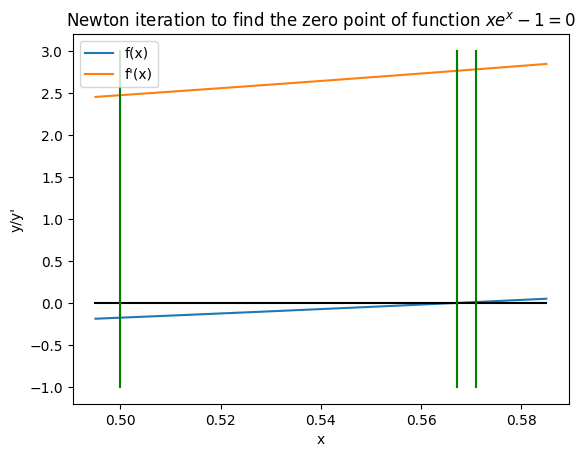

In [37]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.495,0.585,100)
y=[]
y_=[]
y_axis = []
for i in x:
    y.append(f(i))
    y_.append(df(i))    
    y_axis.append(0)

y_sca = np.linspace(-1,3,100)
x_0 = []
x_1 = []
x_2 = []
x_3 = []
for i in y_sca:
    x_0.append(middle_result[0])
    x_1.append(middle_result[1])
    x_2.append(middle_result[2])
    x_3.append(middle_result[3])


plt.plot(x,y,label = 'f(x)')
plt.plot(x,y_,label = "f'(x)")
plt.plot(x,y_axis,color="black")
plt.plot(x_0,y_sca,color = "green")
plt.plot(x_1,y_sca,color = "green")
plt.plot(x_2,y_sca,color = "green")
plt.plot(x_3,y_sca,color = "green")


# plt.scatter(x_disrete_point,y_est,color = 'red')
# plt.scatter(x_disrete_point,y_acc,color = 'red')
plt.xlabel("x")
plt.ylabel("y/y'")
plt.title(r"Newton iteration to find the zero point of function $xe^x-1=0$")
plt.legend(loc = 'upper left')
plt.show()

## 三、弦割法求解

弦切法是一种用于寻找函数根（零）的数值算法。它基于中间值定理，该定理指出，如果$f(x)$是区间$[a，b]$上的连续函数，并且如果$f(a)$和$f(b)$具有相反的符号，则在区间$(a,b)$中至少存在一个数$c$，使得$f(c)=0$。

该算法通过从两个初始点$x_1$和$x_2$开始工作，使得$f(x_1)$和$f(x_2)$具有相反的符号。然后，它找到了通过这两个点的直线的方程：$$y - f(x_1) = [(f(x_2)-f(x_1))/(x_2-x_1)]*(x - x_1)$$这条线与x轴相交的点由下式给出：$$x_3 = x_1 - f(x_1)*[(x_2-x_1)/(f(x_2)-f(x_1))]$$
如果$f(x_3)$具有与$f(x_1)$相同的符号，则新间隔变为$[x3，x2]$。否则，新的间隔变为$[x1，x3]$。
我们重复这个过程，直到我们得到在所需公差范围内的根的近似值。


In [44]:
import math

def f(x):
    return x*math.exp(x)-1

def chord_cut_method(x1, x2, epsilon):
    middle_result = []
    x3=x2
    middle_result.append(x3)
    while abs(f(x3)) > epsilon:
        x3 = x1 - f(x1)*((x2-x1)/(f(x2)-f(x1)))
        middle_result.append(x3)
        if f(x3)*f(x1) < 0:
            x2 = x3
        else:
            x1 = x3
    return x3,middle_result

# Test the function using x_0 = 0 and epsilon = 1e-6
x_0 = 0.5
x_1 = 0.6
epsilon = 1e-6
result,middle_result= chord_cut_method(x_0, x_1, epsilon)
print("The root of xe^x-1=0 is:", result)
print(middle_result)

The root of xe^x-1=0 is: 0.5671432559855425
[0.6, 0.5653151401743668, 0.5670946334838451, 0.5671419961897813, 0.5671432559855425]


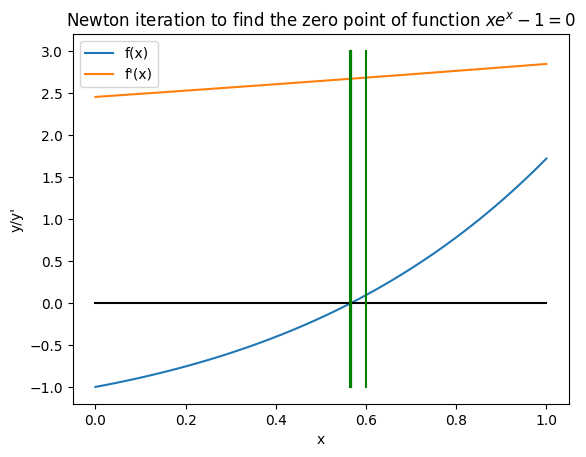

In [45]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,1,100)
y=[]
y_axis = []
for i in x:
    y.append(f(i))  
    y_axis.append(0)

y_sca = np.linspace(-1,3,100)
x_0 = []
x_1 = []
x_2 = []
x_3 = []
x_4 = []
for i in y_sca:
    x_0.append(middle_result[0])
    x_1.append(middle_result[1])
    x_2.append(middle_result[2])
    x_3.append(middle_result[3])
    x_4.append(middle_result[4])


plt.plot(x,y,label = 'f(x)')
plt.plot(x,y_,label = "f'(x)")
plt.plot(x,y_axis,color="black")
plt.plot(x_0,y_sca,color = "green")
plt.plot(x_1,y_sca,color = "green")
plt.plot(x_2,y_sca,color = "green")
plt.plot(x_3,y_sca,color = "green")
plt.plot(x_4,y_sca,color = "green")

# plt.scatter(x_disrete_point,y_est,color = 'red')
# plt.scatter(x_disrete_point,y_acc,color = 'red')
plt.xlabel("x")
plt.ylabel("y/y'")
plt.title(r"Newton iteration to find the zero point of function $xe^x-1=0$")
plt.legend(loc = 'upper left')
plt.show()

更加精细的：

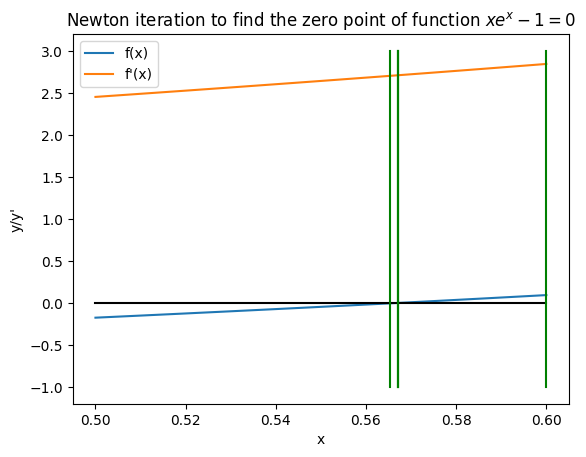

In [46]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.5,0.6,100)
y=[]
y_axis = []
for i in x:
    y.append(f(i))  
    y_axis.append(0)

y_sca = np.linspace(-1,3,100)
x_0 = []
x_1 = []
x_2 = []
x_3 = []
x_4 = []
for i in y_sca:
    x_0.append(middle_result[0])
    x_1.append(middle_result[1])
    x_2.append(middle_result[2])
    x_3.append(middle_result[3])
    x_4.append(middle_result[4])


plt.plot(x,y,label = 'f(x)')
plt.plot(x,y_,label = "f'(x)")
plt.plot(x,y_axis,color="black")
plt.plot(x_0,y_sca,color = "green")
plt.plot(x_1,y_sca,color = "green")
plt.plot(x_2,y_sca,color = "green")
plt.plot(x_3,y_sca,color = "green")
plt.plot(x_4,y_sca,color = "green")

# plt.scatter(x_disrete_point,y_est,color = 'red')
# plt.scatter(x_disrete_point,y_acc,color = 'red')
plt.xlabel("x")
plt.ylabel("y/y'")
plt.title(r"Newton iteration to find the zero point of function $xe^x-1=0$")
plt.legend(loc = 'upper left')
plt.show()